# Определение инвестиционного профиля клиента на основе алгоритмов нечеткой логики

Сегодня управляющие компании предлагают инвесторам, работающим на фондовом рынке, многочисленные стратегии управление активами. 
Однако далеко не каждому клиенту подойдет типичная стратегия, разработанная управляющим. 
Одних интересует максимальная доходность, других – положительный результат при приемлемом уровне рисков. 
Определить оптимальный вариант вложений помогает инвестиционный профиль.

## Понятие инвестиционного профиля

Инвестиционный профиль (риск-профиль) – характеристика инвестора, описывающий поведение на финансовом рынке. 
Составление такого профиля помогает определить запросы клиента, его склонность к рискам и готовность их принимать.

В зависимости от типа инвестиционного профиля можно:
 
- подобрать эффективную стратегию инвестирования
- собрать оптимальный портфель ценных бумаг и других активов
- разработать механизмы реакции на различные рыночные события

Инвестиционный профиль Клиента может быть определен посредством заполнения онлайн-анкеты.
Целью анкетирования является получение сведений о клиенте, позволяющих выявить:

- инвестиционные цели клиента, включая ожидаемую доходность
- допустимый риск (риск, который способен нести клиент)
- инвестиционный горизонт

# Постановка задачи

Основной целью создания программы является автоматизации процедуры установления инвестиционного профиля клиента на основе нечеткой логики.

В соответствии с поставленной целью, создаваемая система должна уметь решать следующие задачи:
- считывание значений параметров по которым определяется инвестиционный профиль
- расчет инвестиционного профиля на основе нечеткой логики
- вывод значений параметров полученного инвестиционного профиля

## Входные данные

### 1. Time horizon (горизонт инвестирования)

Определяется как суммарный скоринг ответов на вопросы онлайн-анкеты: 

#### 1.1 Срок инвестирования

- [ ] менее одного года (1 балл)
- [ ] 3-5 лет (3 балла)
- [ ] 6-10 лет (7 баллов)
- [ ] 11 лет и более (10 баллов)

#### 1.2 Срок начала использования инвестиционных накоплений

- [ ] менее чем через 2 года (0 баллов)
- [ ] 2-5 лет (1 балл)
- [ ] 6-10 лет (4 балла)
- [ ] 11 лет и более (8 баллов)

#### Лингвистическая переменная - Time horizon score
Определяется по сумме набранных баллов [1 - 18] при ответе на вопросы анкеты 1.1 и 1.2

- lower (ML) 
- low (LL)
- average (ZE)
- high (HH)
- higher (MH)

### 2. Толерантность к риску

Определяется как суммарный скоринг ответов на вопросы: 

#### 2.1 Уровень знаний на финансовом рынке
- [ ] нет знаний (0 баллов)
- [ ] есть базовые знания (3 балла)
- [ ] опытный инвестор (7 баллов)
- [ ] эксперт в инвестициях (10 баллов)

#### 2.2 Цель инвестиций
- [ ] сохранение капитала и накоплений (1 балл)
- [ ] пенсионные накопления (обеспеченное будущее) (5 баллов)
- [ ] накопление для определенных целей (крупных покупок) (7 баллов) 
- [ ] получение максимального дохода (10 баллов)

#### 2.3 Ожидаемая доходность от инвестиций
- [ ] хотя бы немного выше депозита (1 балл)
- [ ] около 10% в год (3 балла)
- [ ] около 20% в год (7 баллов)
- [ ] выше 20% в год (10 баллов)

#### 2.4 Отношение к рискам инвестирования
- [ ] главное сохранить сбережения, доходность не так важна (0 баллов)
- [ ] хотелось бы иметь доходность немного выше выше, чем по банковским вкладам (3 балла)
- [ ] хотелось бы иметь доходность, превыщающую банковский вклад в 2 раза (7 баллов)
- [ ] готов инвестировать в инструменты, приносящие максимальный доход (10 баллов)

#### Лингвистическая переменная - Risk tolerance score

Определяется по сумме набранных баллов [0 - 40] при ответе на вопросы онлайн-анкеты 2.1 - 2.4

- lowest (BL) 
- lower (ML)
- low (LL)
- average (ZE)
- high (HH)
- higher (MH)
- highest (BH)

## Выходные данные

### Уровень инвестиционного риска

Число по шкале от 0-100

### Инвестиционный профиль клиента - Risk Profile

Нечеткое множество:

- Conservative (BC) - консервативный
- Moderately-Conservative (MC) - умеренно-консервативный
- Moderate (MM) - умеренный
- Moderately-Aggressive (MA) - умеренно-агрессивный
- Aggressive (BA) - агрессивный 

## Правила

Правила заданы матрицей, которая построена по следующим правилам
- строки матрицы - значения лингвистической переменной Time horizon score
- столбцы матрицы - значения лингвистической переменной Risk tolerance score
- ячека матрицы - значение выходного параметра - Risk Profile 

|    | BL | ML | LL | ZE | HH | MH | BH |
|----|----|----|----|----|----|----|----|
| ML | BC | BC | MC | MC | MM | MM | MM |
| LL | BC | BC | MC | MM | MM | MA | MA |
| ZE | BC | MC | MC | MM | MA | MA | BA |
| HH | MC | MC | MM | MM | MA | BA | BA |
| MH | MC | MC | MM | MA | MA | BA | BA |


In [8]:
import numpy as np
from skfuzzy import control as ctrl

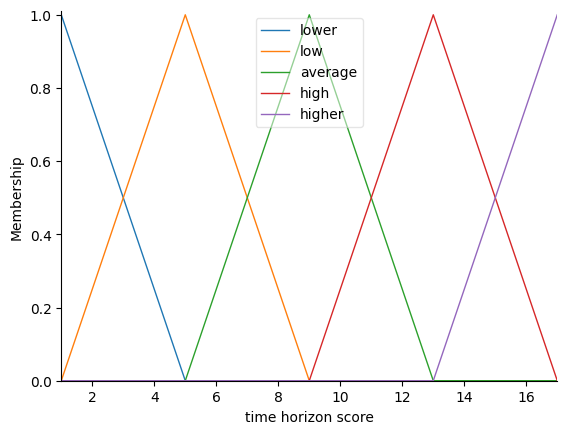

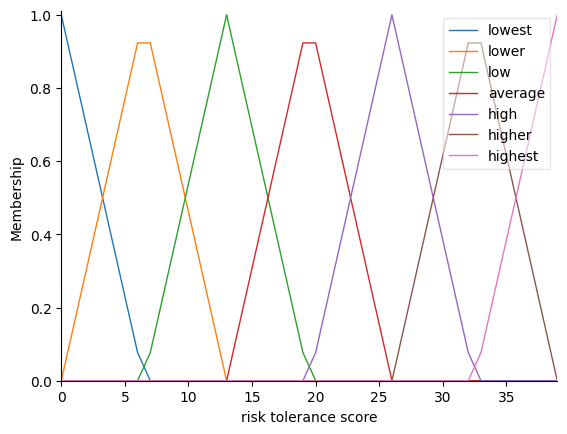

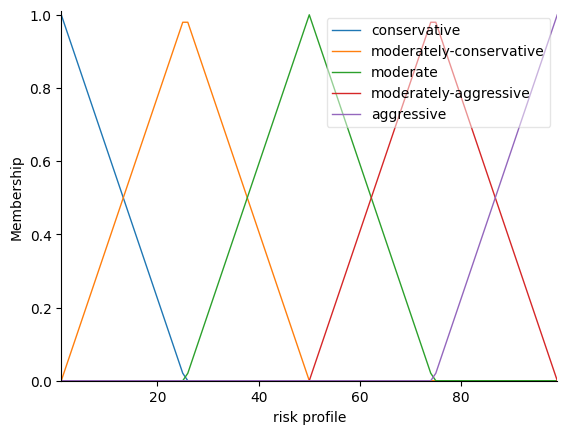

In [9]:
# Определяем лингвистические переменные

time_horizon_score = ctrl.Antecedent(np.arange(1, 18, 1), 'time horizon score')
risk_tolerance_score = ctrl.Antecedent(np.arange(0, 40, 1), 'risk tolerance score')
risk_profile = ctrl.Consequent(np.arange(1, 100, 1), 'risk profile')

# Количество состояний переменной
time_horizon_score.automf(5, variable_type='quant')
risk_tolerance_score.automf(7, variable_type='quant')
risk_profile.automf(5, variable_type='quant', names=['conservative', 'moderately-conservative', 'moderate', 'moderately-aggressive', 'aggressive'])

# Вывод на экран графиков функции принадлежности
time_horizon_score.view()
risk_tolerance_score.view()
risk_profile.view()

In [10]:
# Правила

th_ml = time_horizon_score['lower']
th_ll = time_horizon_score['low']
th_ze = time_horizon_score['average']
th_hh = time_horizon_score['high']
th_mh = time_horizon_score['higher']

rt_bl = risk_tolerance_score['lowest']
rt_ml = risk_tolerance_score['lower']
rt_ll = risk_tolerance_score['low']
rt_ze = risk_tolerance_score['average']
rt_hh = risk_tolerance_score['high']
rt_mh = risk_tolerance_score['higher']
rt_bh = risk_tolerance_score['highest']

rp_bc = risk_profile['conservative']
rp_mc = risk_profile['moderately-conservative']
rp_mm = risk_profile['moderate']
rp_ma = risk_profile['moderately-aggressive']
rp_ba = risk_profile['aggressive']

# row 1
rule1_1 = ctrl.Rule(th_ml & (rt_bl | rt_ml), rp_bc)
rule1_2 = ctrl.Rule(th_ml & (rt_ll | rt_ze), rp_mc)
rule1_3 = ctrl.Rule(th_ml & (rt_hh | rt_mh | rt_bh), rp_mm)

# row 2
rule2_1 = ctrl.Rule(th_ll & (rt_bl | rt_ml), rp_bc)
rule2_2 = ctrl.Rule(th_ll & rt_ll, rp_mc)
rule2_3 = ctrl.Rule(th_ll & (rt_ze | rt_hh), rp_mm)
rule2_4 = ctrl.Rule(th_ll & (rt_mh | rt_bh), rp_ma)

# row 3
rule3_1 = ctrl.Rule(th_ze & rt_bl, rp_bc)
rule3_2 = ctrl.Rule(th_ze & (rt_ml | rt_ll), rp_mc)
rule3_3 = ctrl.Rule(th_ze & rt_ze, rp_mm)
rule3_4 = ctrl.Rule(th_ze & (rt_hh | rt_mh), rp_ma)
rule3_5 = ctrl.Rule(th_ze & rt_bh, rp_ba)

# row 4
rule4_1 = ctrl.Rule(th_hh & (rt_bl | rt_ml), rp_mc)
rule4_2 = ctrl.Rule(th_hh & (rt_ll | rt_ze), rp_mm)
rule4_3 = ctrl.Rule(th_hh & rt_hh, rp_ma)
rule4_4 = ctrl.Rule(th_hh & (rt_mh | rt_bh), rp_ba)

# row 5
rule5_1 = ctrl.Rule(th_mh & (rt_bl | rt_ml), rp_mc)
rule5_2 = ctrl.Rule(th_mh & rt_ll, rp_mm)
rule5_3 = ctrl.Rule(th_mh & (rt_ze | rt_hh), rp_ma)
rule5_4 = ctrl.Rule(th_mh & (rt_mh | rt_bh), rp_ba)

# Контроллер
profile_ctrl = ctrl.ControlSystem([
    rule1_1, 
    rule1_2, 
    rule1_3, 
    rule2_1, 
    rule2_2, 
    rule2_3, 
    rule2_4, 
    rule3_1, 
    rule3_2, 
    rule3_3, 
    rule3_4, 
    rule3_5, 
    rule4_1, 
    rule4_2, 
    rule4_3, 
    rule4_4, 
    rule5_1, 
    rule5_2, 
    rule5_3, 
    rule5_4])


# Тестовый пример 1

Клиент при заполнении анкеты выбрал следующие ответы на вопросы:
 
## 1.1 Срок инвестирования

- [x] менее одного года (1 балл)
- [ ] 3-5 лет (3 балла)
- [ ] 6-10 лет (7 баллов)
- [ ] 11 лет и более (10 баллов)

## 1.2 Срок начала использования инвестиционных накоплений

- [ ] менее чем через 2 года (0 баллов)
- [ ] 2-5 лет (1 балл)
- [x] 6-10 лет (4 балла)
- [ ] 11 лет и более (8 баллов)

## 2.1 Уровень знаний на финансовом рынке
- [ ] нет знаний (0 баллов)
- [ ] есть базовые знания (3 балла)
- [x] опытный инвестор (7 баллов)
- [ ] эксперт в инвестициях (10 баллов)

## 2.2 Цель инвестиций
- [ ] сохранение капитала и накоплений (1 балл)
- [x] пенсионные накопления (обеспеченное будущее) (5 баллов)
- [ ] накопление для определенных целей (крупных покупок) (7 баллов) 
- [ ] получение максимального дохода (10 баллов)

## 2.3 Ожидаемая доходность от инвестиций
- [ ] хотя бы немного выше депозита (1 балл)
- [x] около 10% в год (3 балла)
- [ ] около 20% в год (7 баллов)
- [ ] выше 20% в год (10 баллов)

## 2.4 Отношение к рискам инвестирования
- [ ] главное сохранить сбережения, доходность не так важна (0 баллов)
- [x] хотелось бы иметь доходность немного выше выше, чем по банковским вкладам (3 балла)
- [ ] хотелось бы иметь доходность, превыщающую банковский вклад в 2 раза (7 баллов)
- [ ] готов инвестировать в инструменты, приносящие максимальный доход (10 баллов)

Скоринг по результатам анкетирования:

- Time horizon score = 1 + 4 = 5
- Risk tolerance score = 7 + 5 + 3 + 3 = 18 


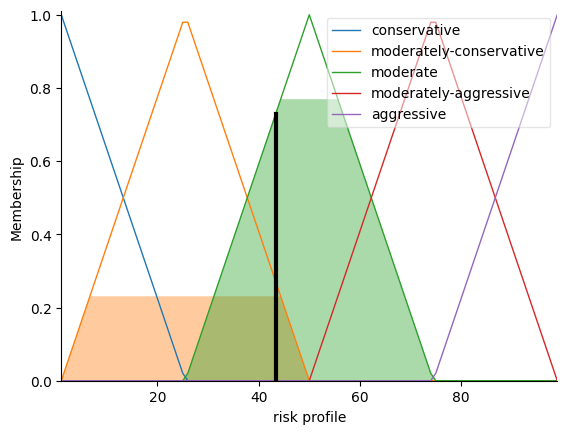

In [4]:
# Ввод данных
profiling = ctrl.ControlSystemSimulation(profile_ctrl)
profiling.input['time horizon score'] = 5
profiling.input['risk tolerance score'] = 18

# Вычисление типа инвестиционного профиля
profiling.compute()
risk_profile.view(sim=profiling)


In [5]:
score = profiling.output["risk profile"]
print(f'Risk profile score: {score:7.4f}', )

print('Risk profile membership:')
for term_key, term_val in risk_profile.terms.items():
    value = term_val.membership_value[profiling]
    print(f'- {term_key}: {value:7.4f} ')

Risk profile score: 43.3562
Risk profile membership:
- conservative:  0.0000 
- moderately-conservative:  0.2308 
- moderate:  0.7692 
- moderately-aggressive:  0.0000 
- aggressive:  0.0000 


## Результат расчетов:
- Риск-профиль клиента: умеренный
- Уровень инвестиционного риска: 43.3562 

# Тестовый пример 2

Клиент при заполнении анкеты выбрал следующие ответы на вопросы:
 
## 1.1 Срок инвестирования

- [ ] менее одного года (1 балл)
- [ ] 3-5 лет (3 балла)
- [x] 6-10 лет (7 баллов)
- [ ] 11 лет и более (10 баллов)

## 1.2 Срок начала использования инвестиционных накоплений

- [ ] менее чем через 2 года (0 баллов)
- [ ] 2-5 лет (1 балл)
- [x] 6-10 лет (4 балла)
- [ ] 11 лет и более (8 баллов)

## 2.1 Уровень знаний на финансовом рынке
- [ ] нет знаний (0 баллов)
- [ ] есть базовые знания (3 балла)
- [x] опытный инвестор (7 баллов)
- [ ] эксперт в инвестициях (10 баллов)

## 2.2 Цель инвестиций
- [ ] сохранение капитала и накоплений (1 балл)
- [ ] пенсионные накопления (обеспеченное будущее) (5 баллов)
- [x] накопление для определенных целей (крупных покупок) (7 баллов) 
- [ ] получение максимального дохода (10 баллов)

## 2.3 Ожидаемая доходность от инвестиций
- [ ] хотя бы немного выше депозита (1 балл)
- [ ] около 10% в год (3 балла)
- [x] около 20% в год (7 баллов)
- [ ] выше 20% в год (10 баллов)

## 2.4 Отношение к рискам инвестирования
- [ ] главное сохранить сбережения, доходность не так важна (0 баллов)
- [ ] хотелось бы иметь доходность немного выше выше, чем по банковским вкладам (3 балла)
- [x] хотелось бы иметь доходность, превыщающую банковский вклад в 2 раза (7 баллов)
- [ ] готов инвестировать в инструменты, приносящие максимальный доход (10 баллов)

Скоринг по результатам анкетирования:

- Time horizon score = 7 + 4 = 11
- Risk tolerance score = 7 + 7 + 7 + 7 = 28 
 

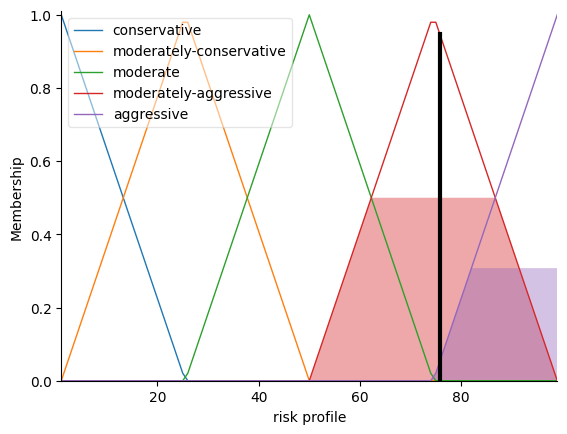

In [6]:
# Ввод данных
profiling = ctrl.ControlSystemSimulation(profile_ctrl)
profiling.input['time horizon score'] = 11
profiling.input['risk tolerance score'] = 28

# Вычисление типа инвестиционного профиля
profiling.compute()
risk_profile.view(sim=profiling)

In [7]:
score = profiling.output["risk profile"]
print(f'Risk profile score: {score:7.4f}', )

print('Risk profile membership:')
for term_key, term_val in risk_profile.terms.items():
    value = term_val.membership_value[profiling]
    print(f'- {term_key}: {value:7.4f} ')

Risk profile score: 75.8094
Risk profile membership:
- conservative:  0.0000 
- moderately-conservative:  0.0000 
- moderate:  0.0000 
- moderately-aggressive:  0.5000 
- aggressive:  0.3077 


## Результат расчетов:
- Риск-профиль клиента: умеренно-аггресивный
- Уровень инвестиционного риска: 75.8094 

# Список ссылок на источники

- [Financial risk tolerance revisited - https://openjournals.libs.uga.edu/fsr/article/view/3890](https://openjournals.libs.uga.edu/fsr/article/view/3890)
- [Charles Schwab: Investor Profile Questionnaire - https://www.schwab.com/resource/investment-questionnaire](https://www.schwab.com/resource/investment-questionnaire)
- [Do Investment Risk Profiles Work? How to Calculate Profiles for Top-Notch Financial Plans - https://www.morningstar.com/views/blog/risk/how-to-measure-investment-risk-profile](https://www.morningstar.com/views/blog/risk/how-to-measure-investment-risk-profile)
